# Check neural netwok implementation in CAM

See if inputs, activations and outputs are correct!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import get2Didxs
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
DATA_DIR = '/scratch/05488/tg847872/nnatmonly_fbp8_D008_andkua_allfix/'
KERAS_DIR = '/home1/05488/tg847872/saved_models/'

In [4]:
def normalize(x, m, s):
    return (x - m[:, None, None]) / s[:, None, None]

## FBP

- inputs : [TBP, QBP, PS, SOLIN, SHFLX, LHFLX]
- outputs : [TPHYSTND, PHQ]

In [5]:
def get_cb_inps(ds, t, m, s):
    x = np.concatenate(
        [ds['NNTBP'][t], ds['NNQBP'][t], ds['NNVBP'][t], np.expand_dims(ds['NNPS'][t], 0),
         np.expand_dims(ds['NNSOLIN'][t], 0), np.expand_dims(ds['NNSHF'][t], 0), np.expand_dims(ds['NNLHF'][t], 0)]
    )
    return normalize(x, m, s)

In [6]:
def stack_outps(ds, t, s='NN'):
    x = np.concatenate(
        [ds[f'{s}DT'].isel(time=t)*C_P, ds[f'{s}DQ'].isel(time=t)*L_S,
         np.expand_dims(ds[f'{s}FSNT'][t], 0)*1e-3, np.expand_dims(ds[f'{s}FSNS'][t], 0)*-1e-3,
         np.expand_dims(ds[f'{s}FLNT'][t], 0)*-1e-3, np.expand_dims(ds[f'{s}FLNS'][t], 0)*1e-3,
         np.expand_dims(ds[f'{s}PRECT'][t], 0)*(1e3*24*3600*2e-2)])
    return x

In [7]:
ds = xr.open_mfdataset(f'{DATA_DIR}*.h1*', decode_times=False)

In [9]:
m = keras.models.load_model(f'{KERAS_DIR}/D008_fbp_engy_ess_sample1_max_rs_deep_eq.h5')

In [10]:
mean = np.loadtxt(f'{KERAS_DIR}/D008_fbp_engy_ess_sample1_max_rs_deep_eq/inp_means.txt', delimiter=',')
std = np.loadtxt(f'{KERAS_DIR}/D008_fbp_engy_ess_sample1_max_rs_deep_eq/inp_max_rs.txt', delimiter=',')

In [11]:
inps = get_cb_inps(ds, 1, mean, std); inps.shape

(94, 64, 128)

In [12]:
inps[:, 0, 0]

array([ 2.37485893e-01,  1.67543351e-01,  1.67970541e-01,  2.70540643e-01,
        2.35346634e-01,  3.05681762e-01,  3.19312475e-01,  3.74128494e-01,
        4.01865736e-01,  3.42001178e-01,  3.18181612e-01,  2.51702575e-01,
        1.63805871e-01,  9.46985839e-03, -1.28003184e-01, -2.17871061e-01,
       -2.52882120e-01, -2.84159952e-01, -2.90541058e-01, -2.77615489e-01,
       -2.76224279e-01, -2.86524474e-01, -2.72037565e-01, -2.76491720e-01,
       -2.82405505e-01, -2.88851131e-01, -2.89455305e-01, -3.06562012e-01,
       -2.99172011e-01, -2.74879991e-01,  2.00954465e-04,  2.52435939e-04,
        3.12665013e-04,  2.52127609e-04,  3.16817517e-04,  2.42444905e-04,
        1.46718424e-04,  9.16737216e-05, -5.27332457e-05, -4.20232705e-04,
       -1.59661227e-03, -4.56620119e-03, -1.12866056e-02, -2.39710787e-02,
       -4.47911323e-02, -4.81295421e-02, -5.49511157e-02, -6.84858381e-02,
       -7.74171692e-02, -8.99359538e-02, -1.13068740e-01, -1.58694653e-01,
       -1.94432550e-01, -

In [13]:
outps = stack_outps(ds, 1, 'PP'); outps.shape

(65, 64, 128)

In [14]:
outps[:, 0, 0]

array([-1.9178672e-03, -2.7869255e-03, -3.1438190e-03,  1.3665311e-03,
       -1.5307984e-03, -2.7152259e-04,  2.5044536e-04, -2.7067588e-05,
       -7.5484719e-04, -6.5285194e-04, -1.8125870e-04, -4.9987837e-04,
        3.6277025e-04, -2.9180376e-04, -1.2659270e-03, -3.8997068e-03,
       -6.1099059e-03, -7.6592942e-03, -7.5177727e-03, -6.6203689e-03,
       -5.6787152e-03, -5.9172497e-03, -5.7838024e-03, -5.4526762e-03,
        6.8937456e-03,  1.0936162e-02,  9.4977962e-03,  1.7152034e-03,
       -9.6488595e-03, -3.1604134e-02, -2.4398252e-05, -2.5318961e-05,
       -3.0277290e-05, -3.8268488e-05, -5.0180814e-05, -5.8543672e-05,
       -5.8443205e-05, -4.5147881e-05, -5.5682576e-05, -5.9996499e-05,
       -6.0947943e-05, -6.6118424e-05, -1.4750220e-04, -2.6919297e-04,
       -4.3243446e-04, -4.1776572e-04,  5.2680675e-04,  7.1096333e-04,
        5.8788911e-04, -8.5834804e-04,  7.0730125e-04, -3.6381211e-03,
        6.9161593e-03,  1.0264447e-02, -3.7385440e-03, -5.7414235e-03,
      

In [15]:
preds = m.predict(inps.reshape(94, -1).T).T.reshape(65, 64, 128); preds.shape

(65, 64, 128)

In [16]:
preds[:, 0, 0]

array([-8.6775333e-05, -1.8492008e-03, -3.3731950e-03,  2.3821981e-03,
       -1.2747219e-03, -1.6081267e-05,  5.3166505e-04,  2.1682066e-04,
       -5.5958255e-04, -4.3367373e-04, -3.0134439e-07, -3.0370351e-04,
        2.0752572e-04, -5.0573796e-04, -1.5211183e-03, -3.8052883e-03,
       -5.5752574e-03, -7.0595848e-03, -6.9526113e-03, -5.9818355e-03,
       -4.8390226e-03, -5.2374457e-03, -4.8361151e-03, -3.3595574e-03,
        6.5981946e-03,  1.1297999e-02,  1.0238528e-02,  2.3160917e-03,
       -9.1898814e-03, -3.2874227e-02, -3.3797547e-05, -4.2331318e-05,
       -5.8209924e-05, -7.8513367e-05, -1.0043681e-04, -1.1612735e-04,
       -1.1588062e-04, -9.2684611e-05, -1.1072849e-04, -1.2519061e-04,
       -1.3777272e-04, -1.5679575e-04, -2.4791295e-04, -3.9247144e-04,
       -6.0974859e-04, -6.7398482e-04,  4.9016449e-05,  2.1072669e-04,
        7.3174371e-05, -1.0360065e-03, -2.7945041e-04, -3.0595427e-03,
        8.7409308e-03,  2.1121805e-03, -8.5384334e-03, -1.1193245e-02,
      

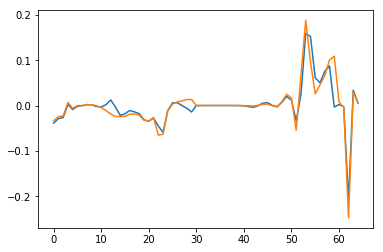

In [43]:
plt.plot(outps[:, 30, 0]); plt.plot(preds[:, 30, 0]);

In [17]:
diff = outps - preds; diff.shape

(65, 64, 128)

In [21]:
weights = m.get_weights()

In [23]:
m.layers[2].alpha

array(0.3, dtype=float32)

In [24]:
def dense(inps, w, b, relu=True):
    x = np.dot(inps, w) + b
    if relu: x = np.maximum(0.3*x, x)
    return x

In [26]:
inps.reshape(94, -1).T.shape

(8192, 94)

In [28]:
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 94)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          24320       input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256)          0           dense_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [29]:
from cbrain.models import fc_model

In [30]:
mcut = fc_model(94, 65, 9*[256], 0.1, 'mse', 'LeakyReLU')

In [33]:
mcut.set_weights(weights)

In [41]:
mcut.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 94)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               24320     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
__________

In [34]:
nnpreds = mcut.predict(inps.reshape(94, -1).T).T.reshape(65, 64, 128); nnpreds.shape

(65, 64, 128)

In [36]:
nnoutps = stack_outps(ds, 1, 'NN'); nnoutps.shape

(65, 64, 128)

In [38]:
nnpreds[:, 0, 0]

array([-9.5473602e-05, -2.0345629e-03, -3.7113205e-03,  2.1832865e-03,
       -1.4024988e-03, -1.7693237e-05,  4.8727146e-04,  1.9871630e-04,
       -6.1567454e-04, -4.7714473e-04, -3.3155084e-07, -3.3414643e-04,
        1.9019749e-04, -5.5643264e-04, -1.6735937e-03, -4.1867266e-03,
       -6.1341152e-03, -7.7672303e-03, -7.6495339e-03, -6.5814485e-03,
       -5.3240815e-03, -5.7624420e-03, -5.3208824e-03, -3.6963159e-03,
        6.0472507e-03,  1.0354625e-02,  9.3836188e-03,  2.1226997e-03,
       -1.0111066e-02, -3.6169503e-02, -3.8902181e-05, -4.8724854e-05,
       -6.7001696e-05, -9.0371686e-05, -1.1560635e-04, -1.3366672e-04,
       -1.3338272e-04, -1.0668329e-04, -1.2745244e-04, -1.4409886e-04,
       -1.5858132e-04, -1.8047751e-04, -2.8535665e-04, -4.5174861e-04,
       -7.0184236e-04, -7.7578053e-04,  4.3330714e-05,  1.8628314e-04,
        6.4686406e-05, -1.1924803e-03, -3.2165740e-04, -3.5216426e-03,
        7.7270139e-03,  1.8671751e-03, -9.8280413e-03, -1.2883823e-02,
      

In [39]:
nnoutps[:, 0, 0]

array([-9.55223150e-05, -2.03461596e-03, -3.71133070e-03,  2.18320708e-03,
       -1.40249962e-03, -1.76896974e-05,  4.87273413e-04,  1.98719776e-04,
       -6.15662895e-04, -4.77152586e-04, -3.57547009e-07, -3.34172975e-04,
        1.90196268e-04, -5.56432758e-04, -1.67359039e-03, -4.18672431e-03,
       -6.13411842e-03, -7.76727078e-03, -7.64960889e-03, -6.58151321e-03,
       -5.32418024e-03, -5.76248625e-03, -5.32103889e-03, -3.69660440e-03,
        6.04787422e-03,  1.03550982e-02,  9.38400812e-03,  2.12293095e-03,
       -1.01109901e-02, -3.61696109e-02, -3.89011730e-05, -4.87228644e-05,
       -6.69985384e-05, -9.03675100e-05, -1.15600546e-04, -1.33660651e-04,
       -1.33376641e-04, -1.06678024e-04, -1.27446270e-04, -1.44091857e-04,
       -1.58572890e-04, -1.80468531e-04, -2.85351620e-04, -4.51744447e-04,
       -7.01835961e-04, -7.75767490e-04,  4.33669884e-05,  1.86333360e-04,
        6.47646302e-05, -1.19236601e-03, -3.21552070e-04, -3.52178514e-03,
        7.72676617e-03,  

In [40]:
outps[:, 0, 0]

array([-1.9178672e-03, -2.7869255e-03, -3.1438190e-03,  1.3665311e-03,
       -1.5307984e-03, -2.7152259e-04,  2.5044536e-04, -2.7067588e-05,
       -7.5484719e-04, -6.5285194e-04, -1.8125870e-04, -4.9987837e-04,
        3.6277025e-04, -2.9180376e-04, -1.2659270e-03, -3.8997068e-03,
       -6.1099059e-03, -7.6592942e-03, -7.5177727e-03, -6.6203689e-03,
       -5.6787152e-03, -5.9172497e-03, -5.7838024e-03, -5.4526762e-03,
        6.8937456e-03,  1.0936162e-02,  9.4977962e-03,  1.7152034e-03,
       -9.6488595e-03, -3.1604134e-02, -2.4398252e-05, -2.5318961e-05,
       -3.0277290e-05, -3.8268488e-05, -5.0180814e-05, -5.8543672e-05,
       -5.8443205e-05, -4.5147881e-05, -5.5682576e-05, -5.9996499e-05,
       -6.0947943e-05, -6.6118424e-05, -1.4750220e-04, -2.6919297e-04,
       -4.3243446e-04, -4.1776572e-04,  5.2680675e-04,  7.1096333e-04,
        5.8788911e-04, -8.5834804e-04,  7.0730125e-04, -3.6381211e-03,
        6.9161593e-03,  1.0264447e-02, -3.7385440e-03, -5.7414235e-03,
      